In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
data=pd.read_csv("gld_price_data.csv")
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
data.shape

(2290, 6)

In [6]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
data.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

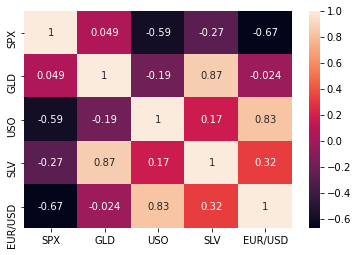

In [11]:
sns.heatmap(data.corr(),annot=True)

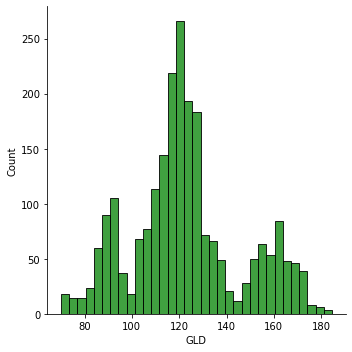

In [18]:
sns.displot(data['GLD'],color='green')

c:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

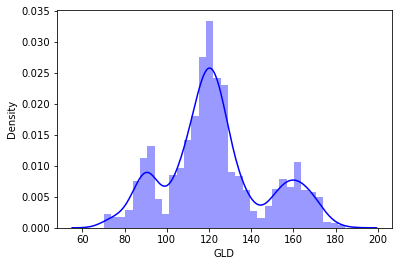

In [19]:
sns.distplot(data['GLD'],color='blue')

In [20]:
x=data.drop(['Date','GLD'] , axis=1)
y=data['GLD']

In [21]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [24]:
from sklearn.preprocessing import MinMaxScaler
min=MinMaxScaler()
x=min.fit_transform(x)
print(x)


[[0.35087007 0.64380934 0.16480084 0.77292403]
 [0.35087007 0.64289628 0.1675345  0.77792447]
 [0.33469315 0.63321764 0.16446239 0.77971277]
 ...
 [0.9317956  0.05889335 0.17938038 0.27281059]
 [0.93500996 0.05861943 0.1746941  0.27524917]
 [0.93302946 0.058855   0.17193961 0.25544572]]


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x.shape,x_train.shape,x_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [28]:
model=RandomForestRegressor(n_estimators=100) # 100 just give the default value

In [29]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [30]:
# Now prediction on test data
prediction=model.predict(x_test)

In [31]:
print(prediction)

[113.70810039 148.14240152 141.43779853 112.49330157 113.66479948
  95.7391994  111.87469969  93.35379925 120.85820039 127.10719934
 147.93679897 120.40529916 119.1544004   88.07620052  96.24430003
  92.70489844 116.37610049  89.17529907 125.37670095 114.85080031
 118.90779953 152.9363024  122.49039803 119.84769994 171.34410014
 108.38409868 120.21340039  87.18069836  88.06580078  88.70029937
 121.27460026 154.34200172 149.50939906 126.01409978 126.67619966
  90.79019868 159.5012003  121.42640167 106.6657005  144.03459705
  92.68739949 127.76520072 117.1765009  152.56090127 119.37849977
  91.28430189  79.48670013 120.29870176 131.74840056 119.03759917
 127.25590101 165.84649995 153.34950019  92.5899992  149.32410052
 152.60079916 113.12890077 112.48600026  87.10819931 127.71009859
 125.12950071 151.62490268 114.41989961 110.61459996 161.44859813
 117.20219844 108.17010107 131.8481     132.25130182 125.53930027
 116.87110005 149.30540201 155.71270062 168.99969597 110.17600081
 140.97019

In [34]:
# R squared error
error_score = metrics.r2_score(y_test, prediction)
print("R squared error : ", error_score)

R squared error :  0.986986713885786


In [35]:
# Compare the Actual and Predicted Values
y_test=list(y_test)

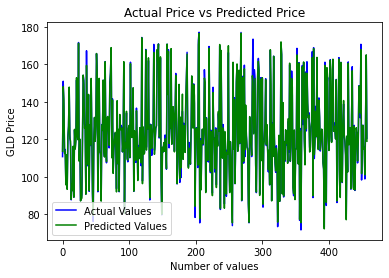

In [36]:
plt.plot(y_test,color='blue',label='Actual Values')
plt.plot(prediction,color='green',label='Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()